In [132]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.signal import savgol_filter
import numpy as np


In [130]:
# Path to folder with all files
path = r'C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\AutoML\results\rs bad range'

def get_average2(path):
    li = []
    all_files = glob.glob(os.path.join(path , "*.csv"))

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df['0'].values)

    average = [sum(col) / float(len(col)) for col in zip(*li)]

    return average

In [119]:
# Put function below here
list_df = pd.DataFrame(get_average(path), columns=["average loss"])
# Put in location of folder to save file in and change name of file
list_df.to_csv(r'C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\AutoML\results\test.csv', index=False, decimal=',')

In [152]:
path = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\E2_GR"
path1 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\E2_GR_TPE"

path2 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\E2_BR_RS"
path3 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\E2_BR_TPE"

path4 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\E2_I_RS"
path5 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\E2_I_TPE"

path6 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\0.25"
path7 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\0.5"
path8 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\0.75"
path9 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\new plots\new results\1"

def get_average(path):
    li = []
    all_files = glob.glob(os.path.join(path , "*.csv"))

    for filename in os.listdir(path):
        df = pd.read_csv(path+"/"+filename, index_col=None, header=0)
        li.append(df['0'].values)

    average = [sum(col) / float(len(col)) for col in zip(*li)]

    average = savgol_filter(average, window_length=100, polyorder=2)
    return average,li

avergae_loss, loss = get_average(path)
avergae_loss_tpe, loss_tpe = get_average(path1)

ci = 2.576 * np.std(avergae_loss)/np.sqrt(len(avergae_loss))
ci_tpe = 2.576 * np.std(avergae_loss_tpe)/np.sqrt(len(avergae_loss_tpe))


avergae_loss_br, loss_br = get_average(path2)
avergae_loss_tpe_br, loss_tpe_br = get_average(path3)

ci_br = 2.576 * np.std(avergae_loss_br)/np.sqrt(len(avergae_loss_br))
ci_tpe_br = 2.576 * np.std(avergae_loss_tpe_br)/np.sqrt(len(avergae_loss_tpe_br))

avergae_loss_i, loss_i = get_average(path4)
avergae_loss_tpe_i, loss_tpe_i = get_average(path5)

ci_i = 2.576 * np.std(avergae_loss_i)/np.sqrt(len(avergae_loss_i))
ci_tpe_i = 2.576 * np.std(avergae_loss_tpe_i)/np.sqrt(len(avergae_loss_tpe_i))

avergae_loss_1, loss_1 = get_average(path6)
avergae_loss_2, loss_2 = get_average(path7)
avergae_loss_3, loss_3 = get_average(path8)
avergae_loss_4, loss_4 = get_average(path9)

ci_1 = 2.576 * np.std(avergae_loss_1)/np.sqrt(len(avergae_loss_1))
ci_2 = 2.576 * np.std(avergae_loss_2)/np.sqrt(len(avergae_loss_2))
ci_3 = 2.576 * np.std(avergae_loss_3)/np.sqrt(len(avergae_loss_3))
ci_4 = 2.576 * np.std(avergae_loss_4)/np.sqrt(len(avergae_loss_4))

In [ ]:
fig,axs = plt.subplots(figsize=(20,10))

axs.plot(range(len(avergae_loss)),avergae_loss,label='Random search',linewidth=1)
axs.fill_between(range(len(avergae_loss)), avergae_loss-ci,avergae_loss+ci ,color='b', alpha=.2)
axs.plot(range(len(avergae_loss_tpe)),avergae_loss_tpe,label='TPE',linewidth=1)
axs.fill_between(range(len(avergae_loss_tpe)), avergae_loss_tpe-ci_tpe,avergae_loss_tpe+ci_tpe ,color='r', alpha=.2)
axs.set_title("Good Range for Random Search and TPE",fontsize=20)
axs.set_xlabel('Function evaluations',fontsize=20)
axs.set_ylabel('Loss',fontsize=20)
axs.legend(fontsize="xx-large")
plt.show()

fig,axs = plt.subplots(figsize=(20,10))

axs.plot(range(len(avergae_loss_br)),avergae_loss_br,label='Random search',linewidth=1)
axs.fill_between(range(len(avergae_loss_br)), avergae_loss_br-ci_br,avergae_loss_br+ci_br ,color='b', alpha=.2)
axs.plot(range(len(avergae_loss_tpe_br)),avergae_loss_tpe_br,label='TPE',linewidth=1)
axs.fill_between(range(len(avergae_loss_tpe_br)), avergae_loss_tpe_br-ci_tpe_br,avergae_loss_tpe_br+ci_tpe_br ,color='r', alpha=.2)
axs.set_title("Bad Range for Random Search and TPE",fontsize=20)
axs.set_xlabel('Function evaluations',fontsize=20)
axs.set_ylabel('Loss',fontsize=20)
axs.legend(fontsize="xx-large")
plt.show()

fig,axs = plt.subplots(figsize=(20,10))

axs.plot(range(len(avergae_loss_i)),avergae_loss_i,label='Random search',linewidth=1)
axs.fill_between(range(len(avergae_loss_i)), avergae_loss_i-ci_i,avergae_loss_i+ci_i ,color='b', alpha=.2)
axs.plot(range(len(avergae_loss_tpe_i)),avergae_loss_tpe_i,label='TPE',linewidth=1)
axs.fill_between(range(len(avergae_loss_tpe_i)), avergae_loss_tpe_i-ci_tpe_i,avergae_loss_tpe_i+ci_tpe_i ,color='r', alpha=.2)
axs.set_title("Interactive for Random Search and TPE",fontsize=20)
axs.set_xlabel('Function evaluations',fontsize=20)
axs.set_ylabel('Loss',fontsize=20)
axs.legend(fontsize="xx-large")
plt.show()

fig,axs = plt.subplots(figsize=(20,10))

axs.plot(range(len(avergae_loss_1)),avergae_loss_1,label='Gamma = 0.25',linewidth=1)
axs.fill_between(range(len(avergae_loss_1)), avergae_loss_1-ci_1,avergae_loss_1+ci_1 ,color='b', alpha=.2)

axs.plot(range(len(avergae_loss_2)),avergae_loss_2,label='Gamma = 0.5',linewidth=1 ,color='r')
axs.fill_between(range(len(avergae_loss_2)), avergae_loss_2-ci_2,avergae_loss_2+ci_2 ,color='r', alpha=.2)

axs.plot(range(len(avergae_loss_3)),avergae_loss_3,label='Gamma = 0.75',linewidth=1,color='y')
axs.fill_between(range(len(avergae_loss_3)), avergae_loss_3-ci_3,avergae_loss_3+ci_3 ,color='y', alpha=.2)

axs.plot(range(len(avergae_loss_4)),avergae_loss_4,label='Gamma = 1',linewidth=1,color='g')
axs.fill_between(range(len(avergae_loss_4)), avergae_loss_4-ci_4,avergae_loss_4+ci_4 ,color='g', alpha=.2)

axs.set_title("Different values of gamma for good range",fontsize=20)
axs.set_xlabel('Function evaluations',fontsize=20)
axs.set_ylabel('Loss',fontsize=20)
axs.legend(fontsize="xx-large")
plt.show()

In [157]:
rw5 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\AutoML\results\bonus 2\rw5"
rw10 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\AutoML\results\bonus 2\rw10"
rw20 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\AutoML\results\bonus 2\rw20"
rw40 = r"C:\Users\evani\OneDrive\AI leiden\Year 2\Semester 1\AutoML\AutoML\results\bonus 2\rw40"


avergae_loss_bonus1, loss_bonus1 = get_average(rw5)
ci_1 = 2.576 * np.std(avergae_loss_bonus1)/np.sqrt(len(avergae_loss_bonus1))

avergae_loss_bonus2, loss_bonus2 = get_average(rw10)
ci_1 = 2.576 * np.std(avergae_loss_bonus2)/np.sqrt(len(avergae_loss_bonus2))

avergae_loss_bonus3, loss_bonus3 = get_average(rw20)
ci_1 = 2.576 * np.std(avergae_loss_bonus3)/np.sqrt(len(avergae_loss_bonus3))

avergae_loss_bonus4, loss_bonus4 = get_average(rw40)
ci_1 = 2.576 * np.std(avergae_loss_bonus4)/np.sqrt(len(avergae_loss_bonus4))


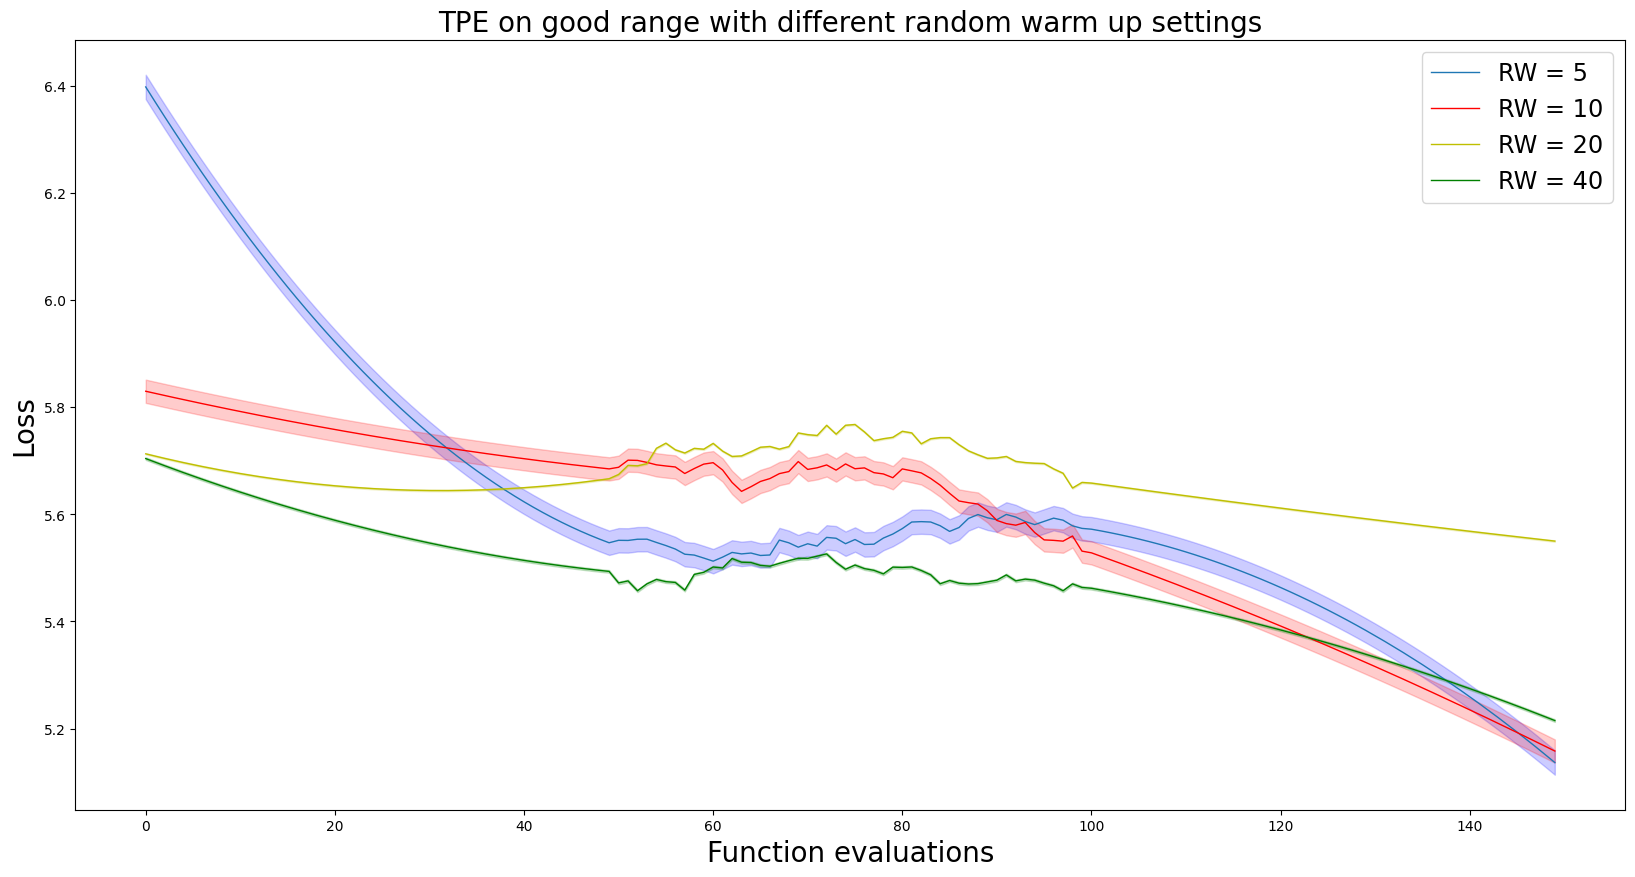

In [158]:
fig,axs = plt.subplots(figsize=(20,10))

axs.plot(range(len(avergae_loss_bonus1)),avergae_loss_bonus1,label='RW = 5',linewidth=1)
axs.fill_between(range(len(avergae_loss_bonus1)), avergae_loss_bonus1-ci_1,avergae_loss_bonus1+ci_1 ,color='b', alpha=.2)

axs.plot(range(len(avergae_loss_bonus2)),avergae_loss_bonus2,label='RW = 10',linewidth=1 ,color='r')
axs.fill_between(range(len(avergae_loss_2)), avergae_loss_bonus2-ci_2,avergae_loss_bonus2+ci_2 ,color='r', alpha=.2)

axs.plot(range(len(avergae_loss_bonus3)),avergae_loss_bonus3,label='RW = 20',linewidth=1,color='y')
axs.fill_between(range(len(avergae_loss_bonus3)), avergae_loss_bonus3-ci_3,avergae_loss_bonus3+ci_3 ,color='y', alpha=.2)

axs.plot(range(len(avergae_loss_bonus4)),avergae_loss_bonus4,label='RW = 40',linewidth=1,color='g')
axs.fill_between(range(len(avergae_loss_bonus4)), avergae_loss_bonus4-ci_4,avergae_loss_bonus4+ci_4 ,color='g', alpha=.2)

axs.set_title("TPE on good range with different random warm up settings",fontsize=20)
axs.set_xlabel('Function evaluations',fontsize=20)
axs.set_ylabel('Loss',fontsize=20)
axs.legend(fontsize="xx-large")
plt.show()